In [15]:
#Perform various levels of analysis to understand the insights from prompt <> response ratings data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image

#import csv into a dataframe
df = pd.read_csv('[NEW] Model Evaluation Results 2_14_2024 - DATA.csv')
#if there is a column with name GUIDANCE, rename it to SUB-CATEGORY
df.rename(columns={'GUIDANCE':'SUB-CATEGORY'}, inplace=True)
#if there is a column with name HELPFULNESS, rename it to INSTRUCTION_FOLLOWING
df.rename(columns={'HELPFULNESS':'INSTRUCTION_FOLLOWING'}, inplace=True)
#if there is a column with name RESPONSE_HELPFULNESS_REASONING, rename it to RESPONSE_INSTRUCTION_FOLLOWING_REASONING
df.rename(columns={'RESPONSE_HELPFULNESS_REASONING':'RESPONSE_INSTRUCTION_FOLLOWING_REASONING'}, inplace=True)
#if there is a column with name ALTERNATE GUIDANCE, rename it to ALTERNATE_SUB-CATEGORY
df.rename(columns={'ALTERNATE GUIDANCE':'ALTERNATE_SUB-CATEGORY'}, inplace=True)
#rename column FEEDBACK HANDLING \nfail/pass (starting 2) to FEEDBACK_HANDLING
df.rename(columns={'FEEDBACK HANDLING \nfail/pass (starting 2)':'FEEDBACK_HANDLING'}, inplace=True)
df.rename(columns={'AMBIGUITY HANDLING \r\nfail/pass \r\n(starting 1)':'AMBIGUITY_HANDLING'}, inplace=True)
df.rename(columns={'REPETITION \r\nfail/pass \r\n(might apply starting 1)':'REPETITION'}, inplace=True)
df.rename(columns={'RETENTION fail/pass  (starting 2)': 'RETENTION'}, inplace=True)
df.rename(columns={'REDIRECTION fail/pass (starting 2)': 'REDIRECTION'}, inplace=True)
df.rename(columns={'CREATIVITY OR FACTUALITY (all turns) ': 'CREATIVITY_OR_FACTUALITY'}, inplace=True)
print(df.columns)

Index(['TASK_ID', 'DOMAIN', 'CATEGORY', 'SUB-CATEGORY', 'TURN_NUMBER',
       'PROMPT', 'RESPONSE', 'CREATIVITY_OR_FACTUALITY', 'FACTUALITY SCORE',
       'RESPONSE_FACTUALITY_REASONING', 'CREATIVITY SCORE',
       'RESPONSE_CREATIVITY_REASONING', 'INSTRUCTION_FOLLOWING',
       'RESPONSE_INSTRUCTION_FOLLOWING_REASONING', 'CONVERSATIONALITY',
       'RESPONSE_CONVERSATIONALITY_REASONING',
       'RESPONSE_CONVERSATIONALITY_FEATURES', 'REPETITION', 'RETENTION',
       'REDIRECTION', 'AMBIGUITY_HANDLING', 'FEEDBACK_HANDLING',
       'DOMAIN APPLICABLE ', 'CATEGORY APPLICABLE', 'GUIDANCE APPLICABLE',
       'ALTERNATE DOMAIN', 'ALTERNATE CATEGORY', 'ALTERNATE_SUB-CATEGORY'],
      dtype='object')


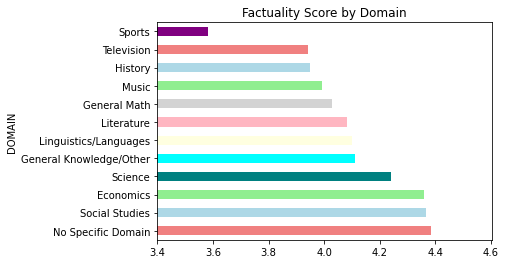

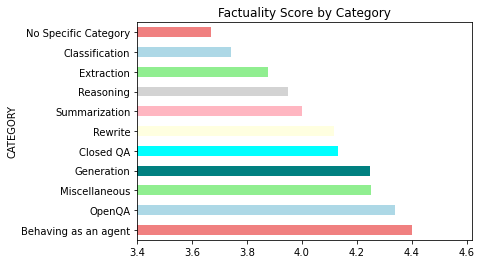

posx and posy should be finite values
posx and posy should be finite values


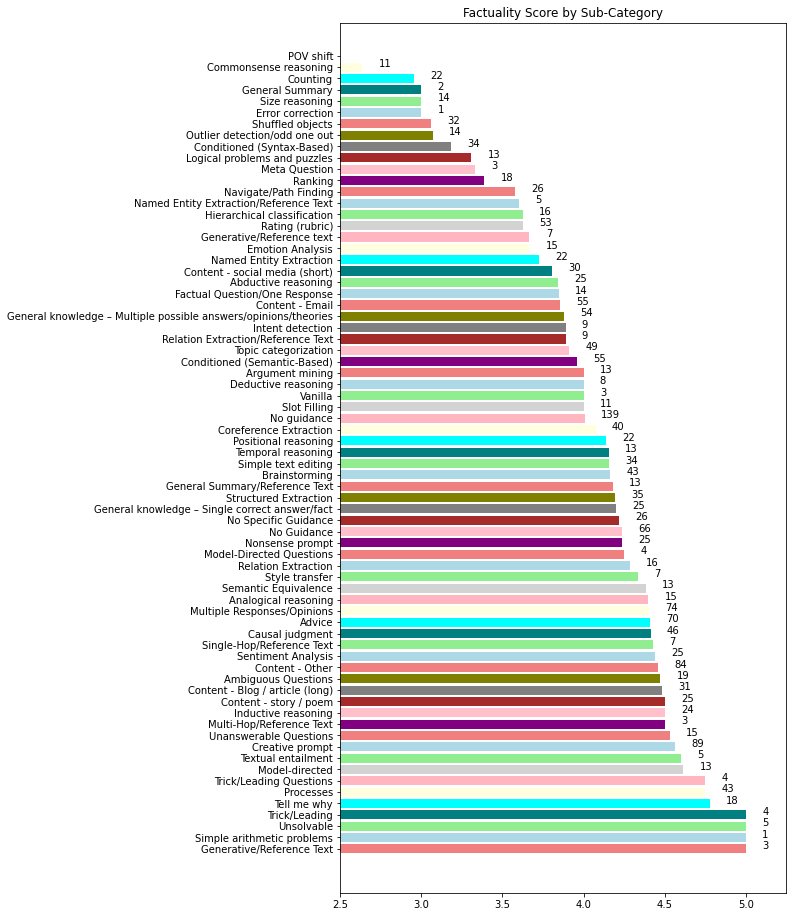

In [16]:
# draw a bar graph of FACTUALITY SCORE by DOMAIN, with DOMAIN on Y axis and FACTUALITY SCORE on X axis
colors = ['lightcoral', 'lightblue', 'lightgreen', 'teal', 'aqua', 'lightyellow', 'lightpink', 'lightgrey', 'lightgreen', 'lightblue', 'lightcoral','purple','pink','brown','gray','Olive']
df['DOMAIN'] = df['ALTERNATE DOMAIN'].fillna(df['DOMAIN'])
sorted_df = df.groupby('DOMAIN')['FACTUALITY SCORE'].mean().sort_values(ascending=False)
ax = sorted_df.plot(kind='barh', color=colors)
ax.set_xlim(3.4, ax.get_xlim()[1])
plt.title('Factuality Score by Domain')
plt.show()

# draw a bar graph of FACTUALITY SCORE by CATEGORY, with DOMAIN on Y axis and FACTUALITY SCORE on X axis
df['CATEGORY'] = df['ALTERNATE CATEGORY'].fillna(df['CATEGORY'])
sorted_df = df.groupby('CATEGORY')['FACTUALITY SCORE'].mean().sort_values(ascending=False)
ax = sorted_df.plot(kind='barh', color=colors)
ax.set_xlim(3.4, ax.get_xlim()[1])
plt.title('Factuality Score by Category')
plt.show()

# draw a bar graph of FACTUALITY SCORE by SUB_CATEGORY, with DOMAIN on Y axis and FACTUALITY SCORE on X axis
df['SUB-CATEGORY'] = df['ALTERNATE_SUB-CATEGORY'].fillna(df['SUB-CATEGORY'])
sorted_df = df.groupby('SUB-CATEGORY')['FACTUALITY SCORE'].mean().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(8, 16))  # Increase the figsize to increase the vertical length
ax.barh(sorted_df.index, sorted_df.values, color=colors)

# Display number of samples on the chart
for i, v in enumerate(sorted_df.values):
    ax.text(v + 0.1, i, str(df['SUB-CATEGORY'].value_counts()[sorted_df.index[i]]), color='black')
ax.set_xlim(2.5, ax.get_xlim()[1])
plt.title('Factuality Score by Sub-Category')
plt.show()

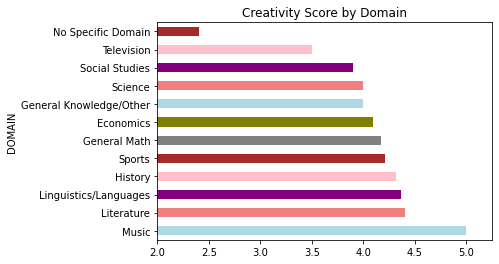

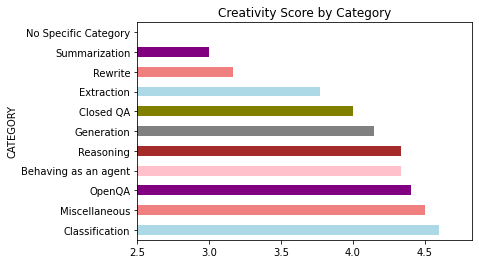

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

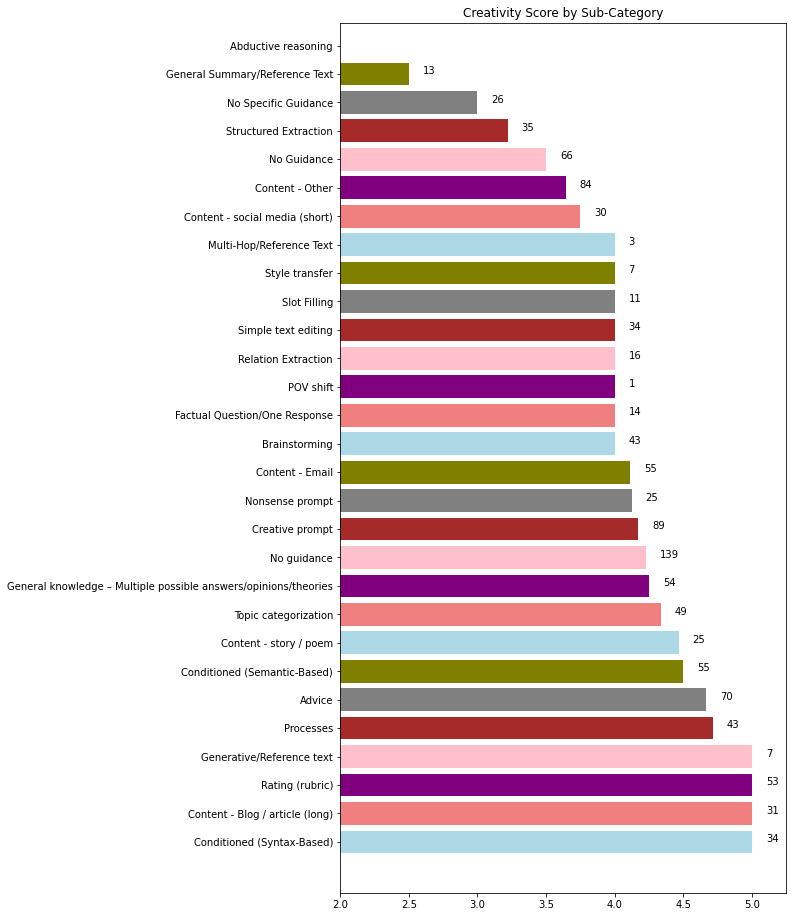

In [17]:
# draw a bar graph of Creativity Score by DOMAIN, with DOMAIN on Y axis and Creativity Score on X axis
colors = ['lightblue', 'lightcoral','purple','pink','brown','gray','Olive']
df['DOMAIN'] = df['ALTERNATE DOMAIN'].fillna(df['DOMAIN'])
sorted_df = df.groupby('DOMAIN')['CREATIVITY SCORE'].mean().sort_values(ascending=False)
ax = sorted_df.plot(kind='barh', color=colors)
ax.set_xlim(2, ax.get_xlim()[1])
plt.title('Creativity Score by Domain')
plt.show()

# draw a bar graph of Creativity Score by CATEGORY, with DOMAIN on Y axis and Creativity Score on X axis
df['CATEGORY'] = df['ALTERNATE CATEGORY'].fillna(df['CATEGORY'])
sorted_df = df.groupby('CATEGORY')['CREATIVITY SCORE'].mean().sort_values(ascending=False)
ax = sorted_df.plot(kind='barh', color=colors)
ax.set_xlim(2.5, ax.get_xlim()[1])
plt.title('Creativity Score by Category')
plt.show()

# draw a bar graph of Creativity Score by SUB_CATEGORY, with DOMAIN on Y axis and Creativity Score on X axis
df['SUB-CATEGORY'] = df['ALTERNATE_SUB-CATEGORY'].fillna(df['SUB-CATEGORY'])
sorted_df = df.groupby('SUB-CATEGORY')['CREATIVITY SCORE'].mean().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(8, 16))  # Increase the figsize to increase the vertical length
ax.barh(sorted_df.index, sorted_df.values, color=colors)

# Display number of samples on the chart
for i, v in enumerate(sorted_df.values):
    ax.text(v + 0.1, i, str(df['SUB-CATEGORY'].value_counts()[sorted_df.index[i]]), color='black')
ax.set_xlim(2, ax.get_xlim()[1])
plt.title('Creativity Score by Sub-Category')
plt.show()

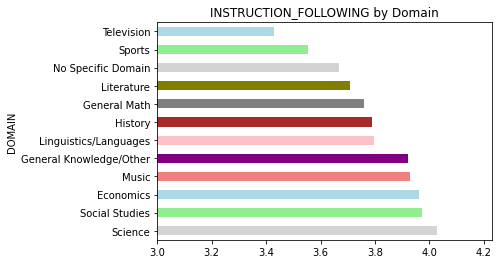

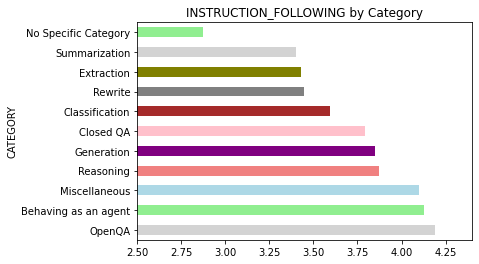

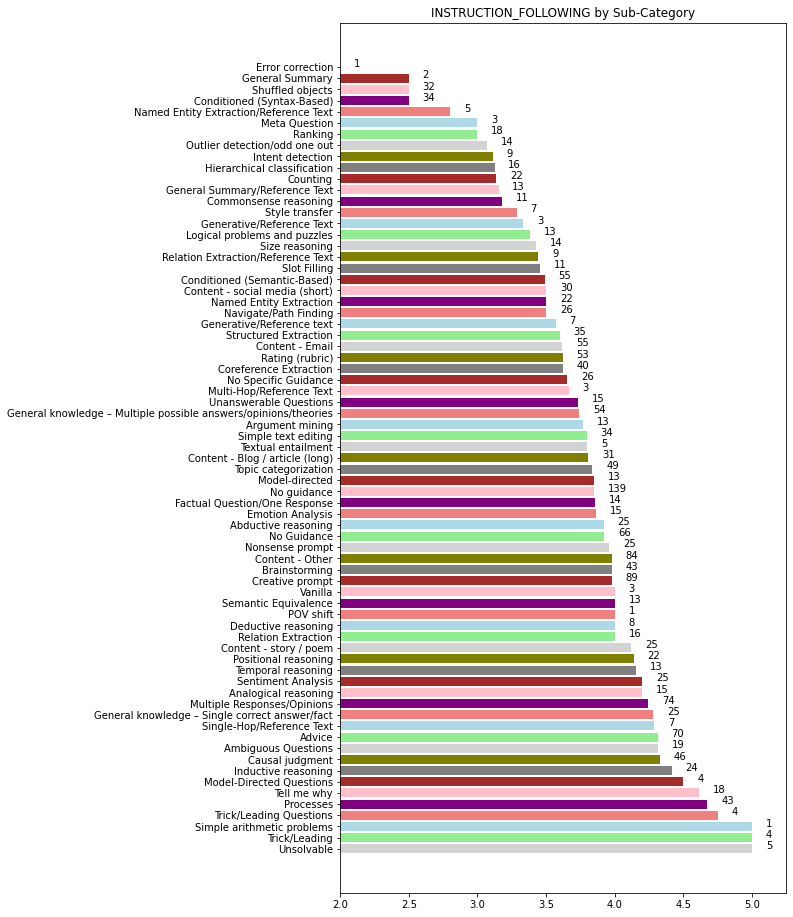

In [18]:
# draw a bar graph of INSTRUCTION_FOLLOWING by DOMAIN, with DOMAIN on Y axis and INSTRUCTION_FOLLOWING on X axis
colors = ['lightgrey', 'lightgreen', 'lightblue', 'lightcoral','purple','pink','brown','gray','Olive']
df['DOMAIN'] = df['ALTERNATE DOMAIN'].fillna(df['DOMAIN'])
sorted_df = df.groupby('DOMAIN')['INSTRUCTION_FOLLOWING'].mean().sort_values(ascending=False)
ax = sorted_df.plot(kind='barh', color=colors)
ax.set_xlim(3, ax.get_xlim()[1])
plt.title('INSTRUCTION_FOLLOWING by Domain')
plt.show()

# draw a bar graph of INSTRUCTION_FOLLOWING by CATEGORY, with DOMAIN on Y axis and INSTRUCTION_FOLLOWING on X axis
df['CATEGORY'] = df['ALTERNATE CATEGORY'].fillna(df['CATEGORY'])
sorted_df = df.groupby('CATEGORY')['INSTRUCTION_FOLLOWING'].mean().sort_values(ascending=False)
ax = sorted_df.plot(kind='barh', color=colors)
ax.set_xlim(2.5, ax.get_xlim()[1])
plt.title('INSTRUCTION_FOLLOWING by Category')
plt.show()

# draw a bar graph of INSTRUCTION_FOLLOWING by SUB_CATEGORY, with DOMAIN on Y axis and INSTRUCTION_FOLLOWING on X axis
df['SUB-CATEGORY'] = df['ALTERNATE_SUB-CATEGORY'].fillna(df['SUB-CATEGORY'])
sorted_df = df.groupby('SUB-CATEGORY')['INSTRUCTION_FOLLOWING'].mean().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(8, 16))  # Increase the figsize to increase the vertical length
ax.barh(sorted_df.index, sorted_df.values, color=colors)

# Display number of samples on the chart
for i, v in enumerate(sorted_df.values):
    ax.text(v + 0.1, i, str(df['SUB-CATEGORY'].value_counts()[sorted_df.index[i]]), color='black')
ax.set_xlim(2, ax.get_xlim()[1])
plt.title('INSTRUCTION_FOLLOWING by Sub-Category')
plt.show()

Text(0.5, 1.0, 'Top 50 PROMPT bigrams')

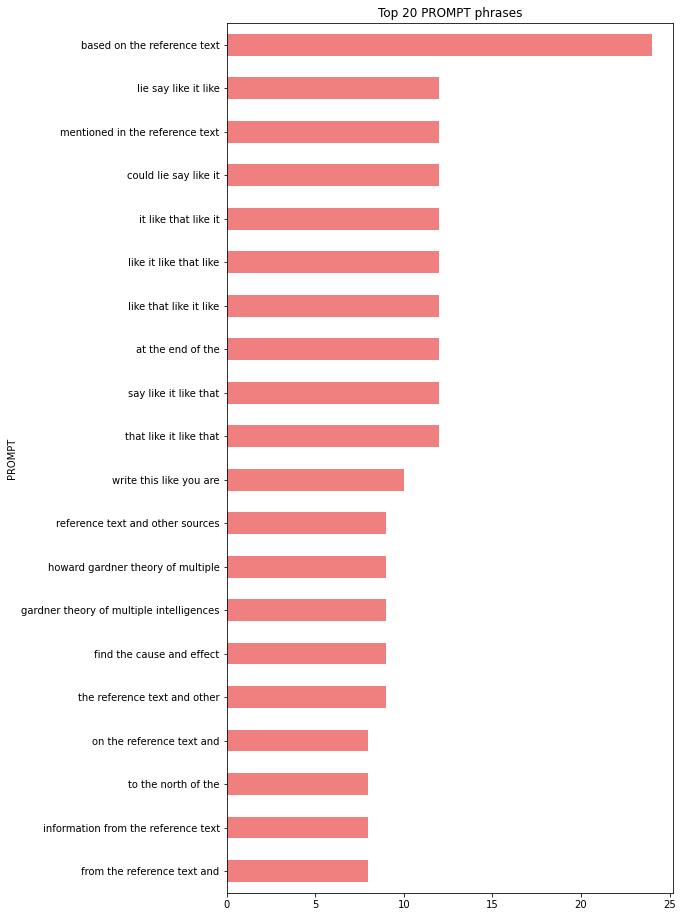

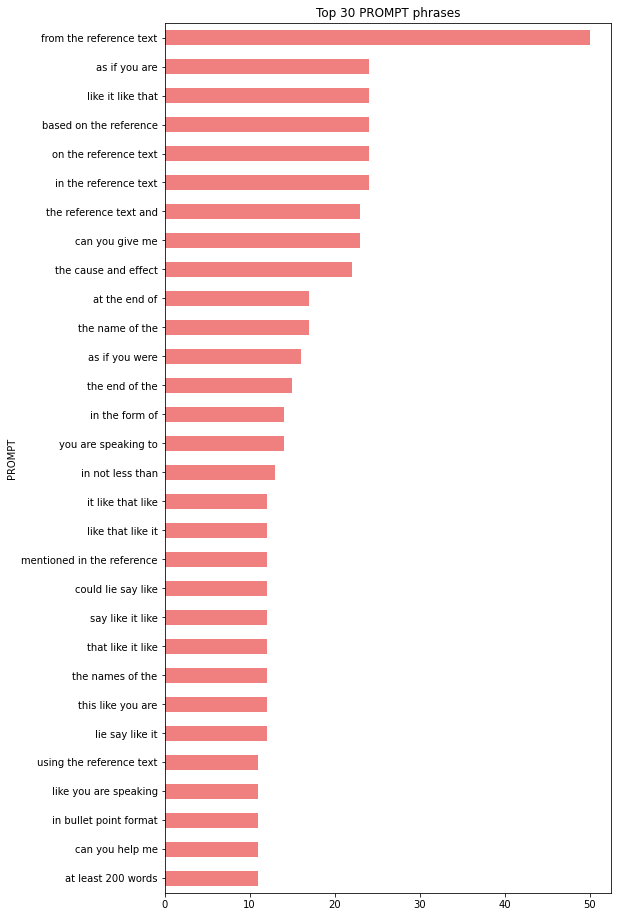

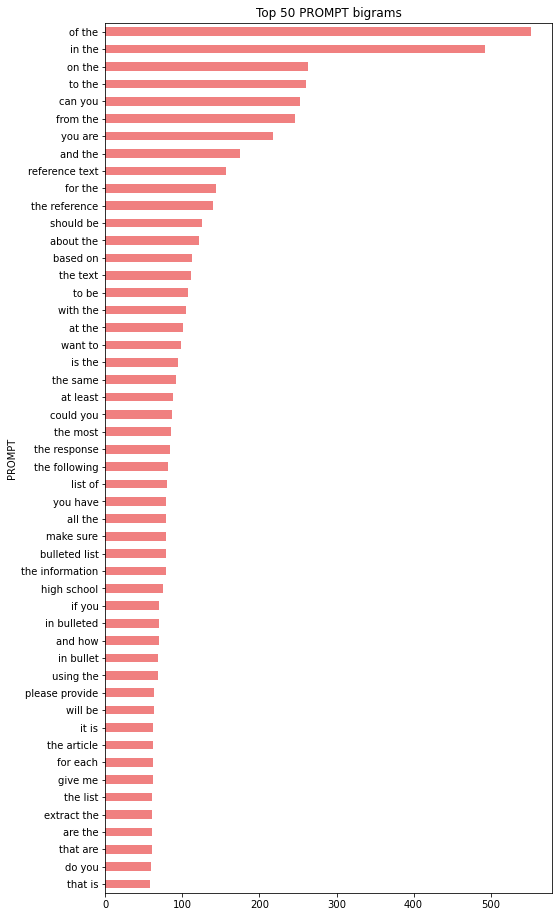

In [19]:
#conduct a n-gram analyis on the PROMPT column to find top 20 occuring phrases
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import re
plt.subplots(figsize=(8, 16))
def get_top_n_gram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]
corpus = df['PROMPT'].dropna()
common_words = get_top_n_gram(corpus, 5)
df1 = pd.DataFrame(common_words, columns = ['PROMPT' , 'count'])
df1.groupby('PROMPT').sum()['count'].sort_values(ascending=True).plot(kind='barh', color='lightcoral')
#increase the vertical lenght of the plot
plt.title('Top 20 PROMPT phrases')
#plt.show()


plt.subplots(figsize=(8, 16))
def get_top_n_gram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:30]
corpus = df['PROMPT'].dropna()
common_words = get_top_n_gram(corpus, 4)
df1 = pd.DataFrame(common_words, columns = ['PROMPT' , 'count'])
df1.groupby('PROMPT').sum()['count'].sort_values(ascending=True).plot(kind='barh', color='lightcoral')
#increase the vertical lenght of the plot
plt.title('Top 30 PROMPT phrases')
#plt.show()


plt.subplots(figsize=(8, 16))
def get_top_n_gram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:50]
corpus = df['PROMPT'].dropna()
common_words = get_top_n_gram(corpus, 2)
df1 = pd.DataFrame(common_words, columns = ['PROMPT' , 'count'])
df1.groupby('PROMPT').sum()['count'].sort_values(ascending=True).plot(kind='barh', color='lightcoral')
#increase the vertical lenght of the plot
plt.title('Top 50 PROMPT bigrams')
#plt.show()


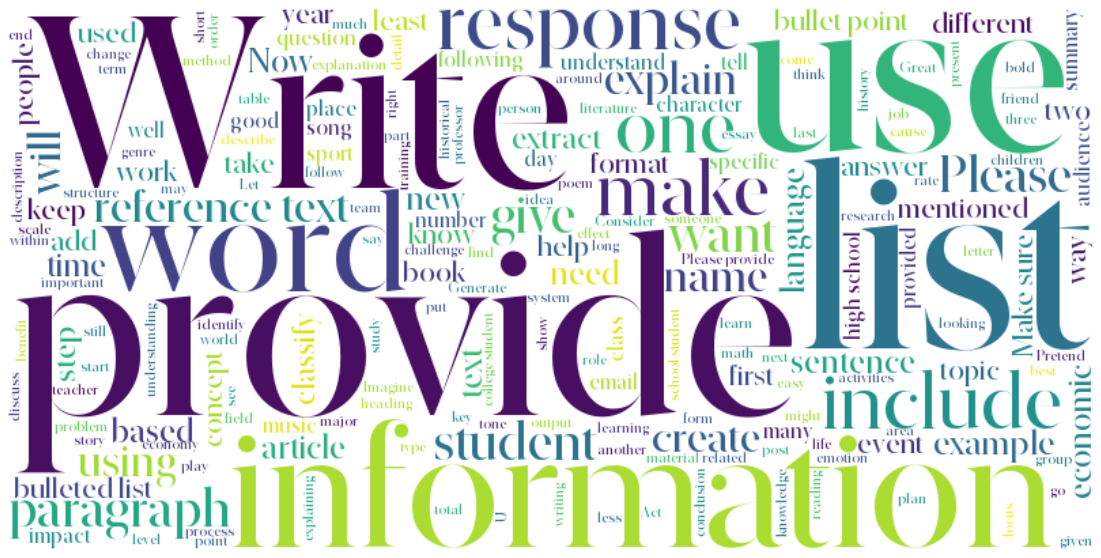

In [20]:
#convert corpus to string
corpus = ' '.join(corpus)
wordcloud = WordCloud(font_path='/System/Library/Fonts/NewYork.ttf', width=800, height=400, background_color='white').generate(corpus)
plt.figure(figsize=(30, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

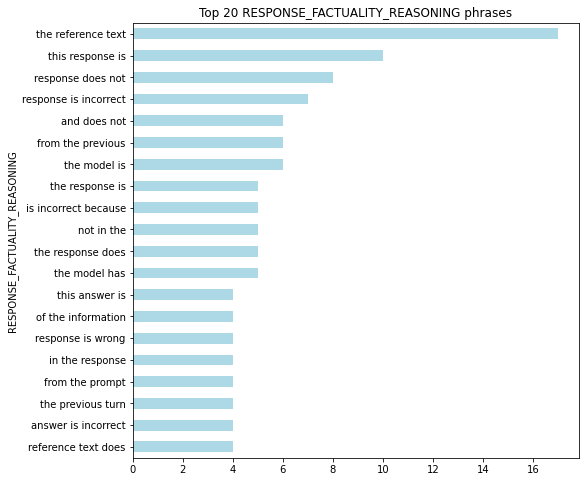

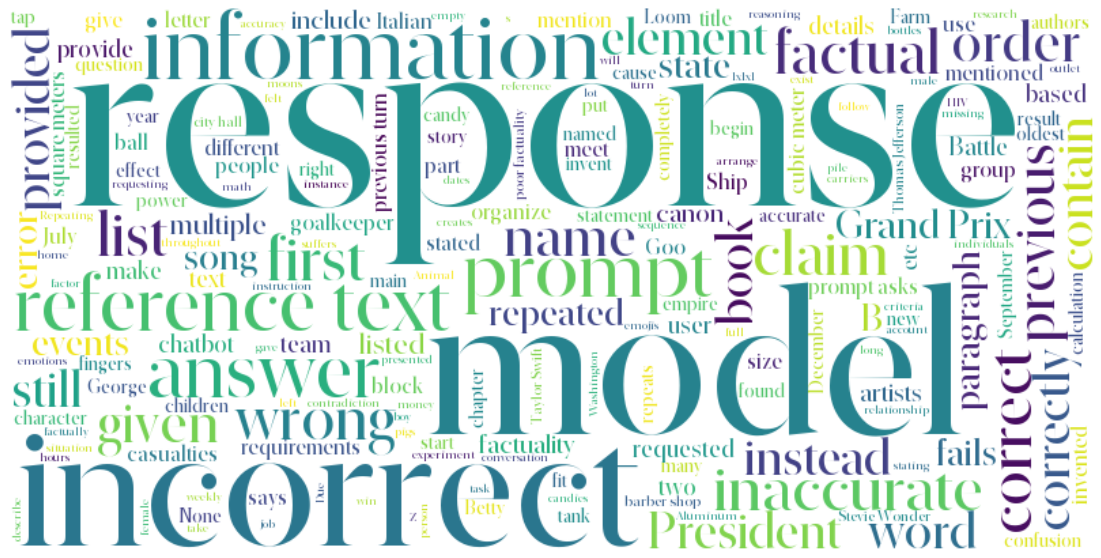

In [21]:
#conduct a n-gram analyis on the RESPONSE_FACTUALITY_REASONING column to find top 20 occuring phrases
plt.subplots(figsize=(8, 8))
def get_top_n_gram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]
corpus = df['RESPONSE_FACTUALITY_REASONING'].dropna()
common_words = get_top_n_gram(corpus, 3)
df1 = pd.DataFrame(common_words, columns = ['RESPONSE_FACTUALITY_REASONING' , 'count'])
df1.groupby('RESPONSE_FACTUALITY_REASONING').sum()['count'].sort_values(ascending=True).plot(kind='barh', color='lightblue')
#increase the vertical lenght of the plot
plt.title('Top 20 RESPONSE_FACTUALITY_REASONING phrases')
#plt.show()


#convert corpus to string
corpus = ' '.join(corpus)
wordcloud = WordCloud(font_path='/System/Library/Fonts/NewYork.ttf', width=800, height=400, background_color='white').generate(corpus)
plt.figure(figsize=(30, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

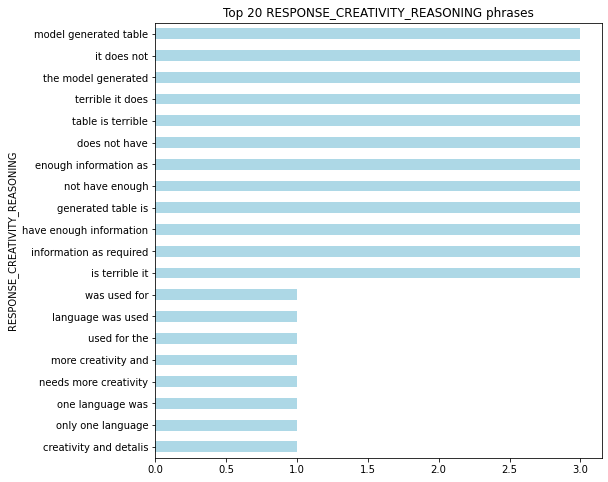

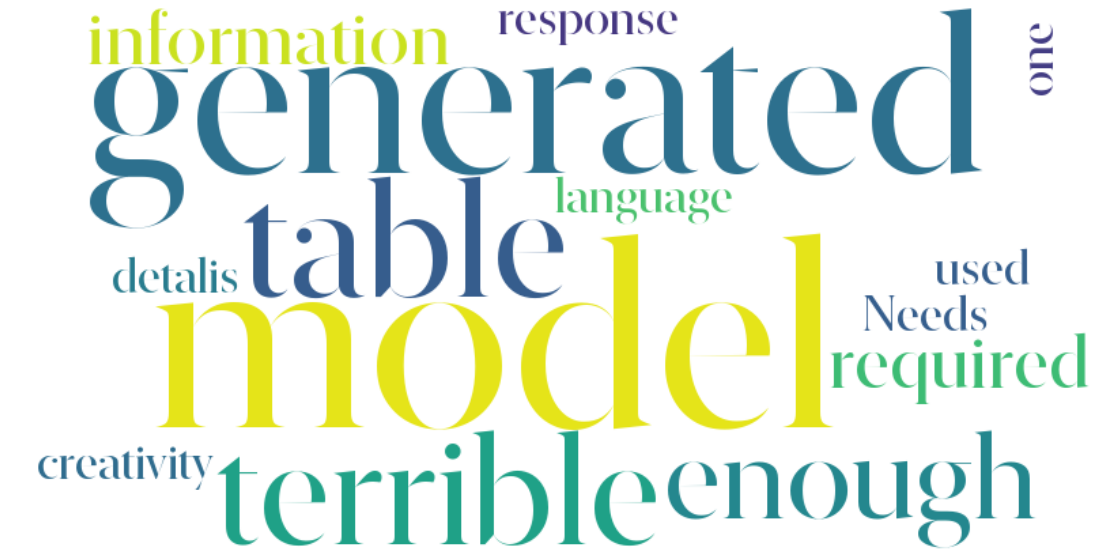

In [22]:
#conduct a n-gram analyis on the RESPONSE_CREATIVITY_REASONING column to find top 20 occuring phrases
plt.subplots(figsize=(8, 8))
def get_top_n_gram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]
corpus = df['RESPONSE_CREATIVITY_REASONING'].dropna()
common_words = get_top_n_gram(corpus, 3)
df1 = pd.DataFrame(common_words, columns = ['RESPONSE_CREATIVITY_REASONING' , 'count'])
df1.groupby('RESPONSE_CREATIVITY_REASONING').sum()['count'].sort_values(ascending=True).plot(kind='barh', color='lightblue')
#increase the vertical lenght of the plot
plt.title('Top 20 RESPONSE_CREATIVITY_REASONING phrases')
#plt.show()


#convert corpus to string
corpus = ' '.join(corpus)
wordcloud = WordCloud(font_path='/System/Library/Fonts/NewYork.ttf', width=800, height=400, background_color='white').generate(corpus)
plt.figure(figsize=(30, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

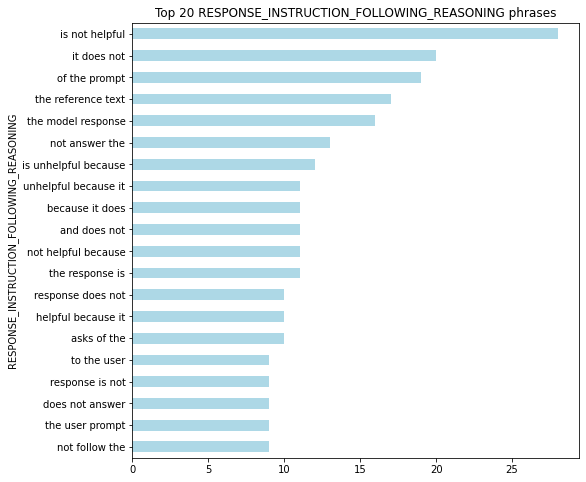

(-0.5, 799.5, 399.5, -0.5)

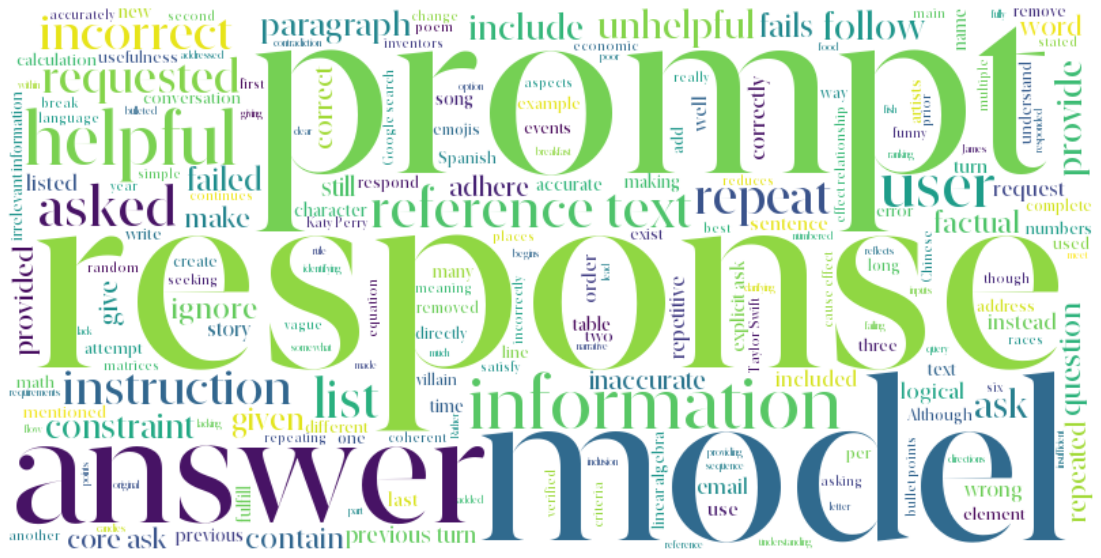

In [23]:
#conduct a n-gram analyis on the RESPONSE_INSTRUCTION_FOLLOWING_REASONING column to find top 20 occuring phrases
plt.subplots(figsize=(8, 8))
def get_top_n_gram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]
corpus = df['RESPONSE_INSTRUCTION_FOLLOWING_REASONING'].dropna()
common_words = get_top_n_gram(corpus, 3)
df1 = pd.DataFrame(common_words, columns = ['RESPONSE_INSTRUCTION_FOLLOWING_REASONING' , 'count'])
df1.groupby('RESPONSE_INSTRUCTION_FOLLOWING_REASONING').sum()['count'].sort_values(ascending=True).plot(kind='barh', color='lightblue')
#increase the vertical lenght of the plot
plt.title('Top 20 RESPONSE_INSTRUCTION_FOLLOWING_REASONING phrases')
plt.show()

#convert corpus to string
corpus = ' '.join(corpus)
wordcloud = WordCloud(font_path='/System/Library/Fonts/NewYork.ttf', width=800, height=400, background_color='white').generate(corpus)
plt.figure(figsize=(30, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
#plt.show()

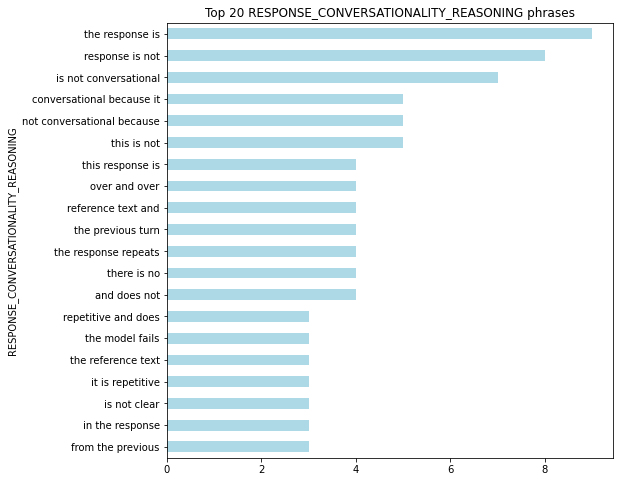

(-0.5, 799.5, 399.5, -0.5)

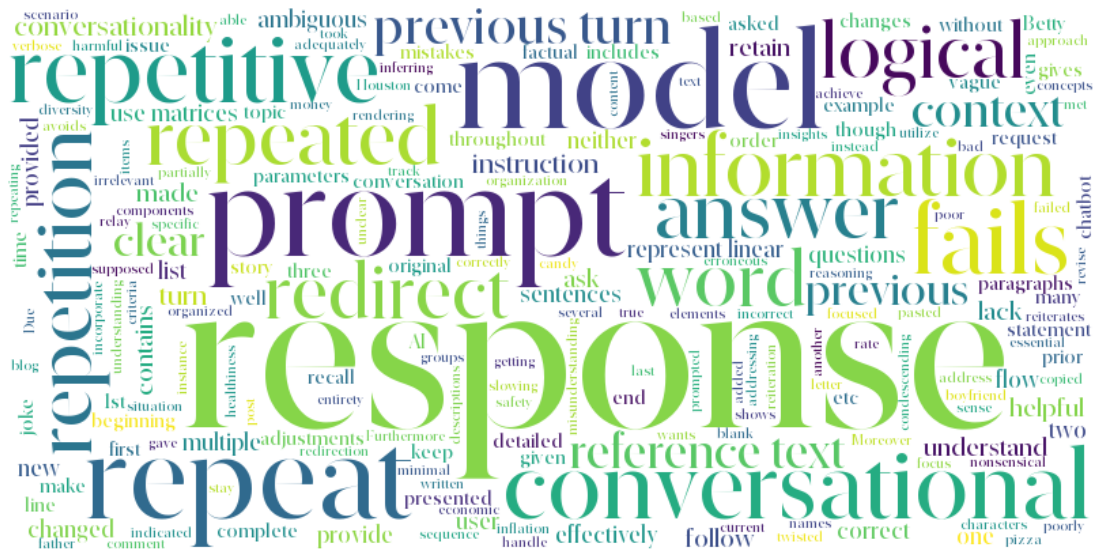

In [24]:
#conduct a n-gram analyis on the RESPONSE_CONVERSATIONALITY_REASONING column to find top 20 occuring phrases
plt.subplots(figsize=(8, 8))
def get_top_n_gram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]
corpus = df['RESPONSE_CONVERSATIONALITY_REASONING'].dropna()
common_words = get_top_n_gram(corpus, 3)
df1 = pd.DataFrame(common_words, columns = ['RESPONSE_CONVERSATIONALITY_REASONING' , 'count'])
df1.groupby('RESPONSE_CONVERSATIONALITY_REASONING').sum()['count'].sort_values(ascending=True).plot(kind='barh', color='lightblue')
#increase the vertical lenght of the plot
plt.title('Top 20 RESPONSE_CONVERSATIONALITY_REASONING phrases')
plt.show()

#convert corpus to string
corpus = ' '.join(corpus)
wordcloud = WordCloud(font_path='/System/Library/Fonts/NewYork.ttf', width=800, height=400, background_color='white').generate(corpus)
plt.figure(figsize=(30, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
#plt.show()

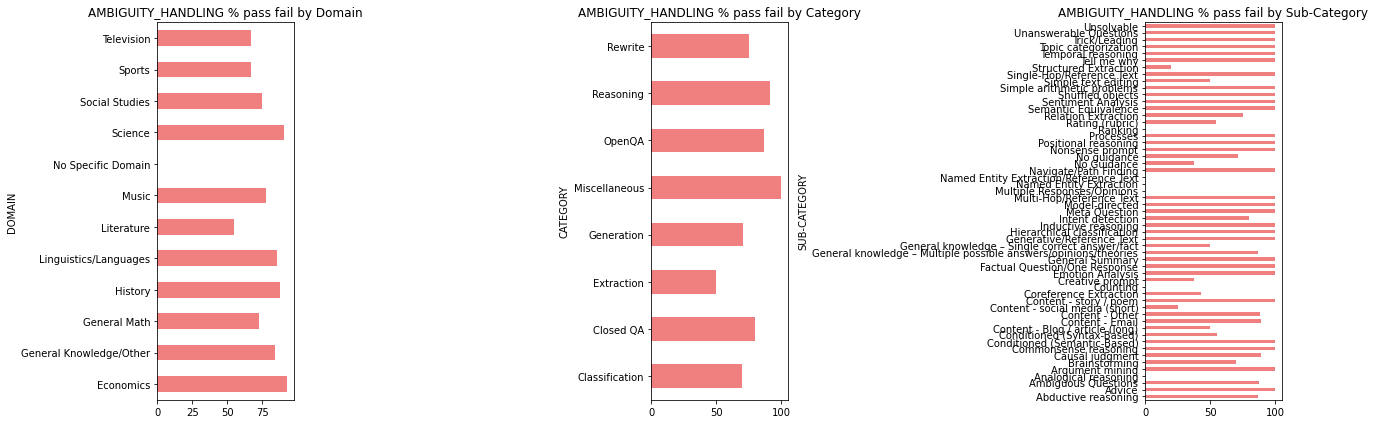

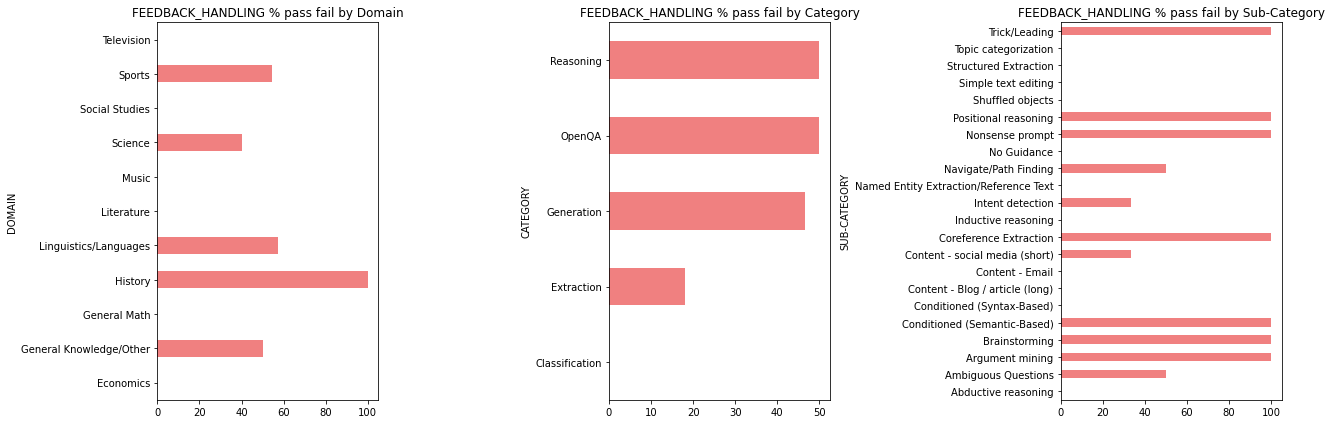

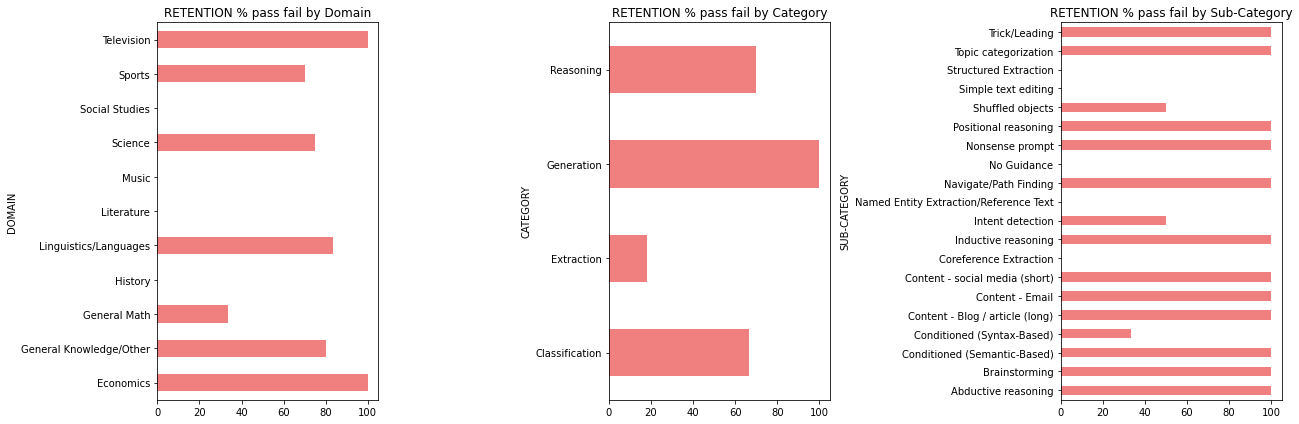

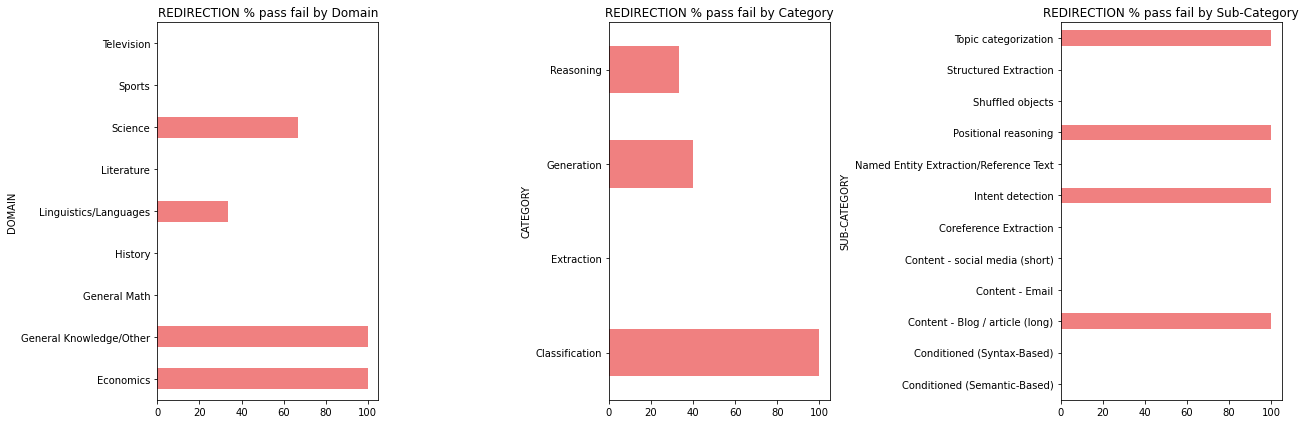

In [25]:
import matplotlib.pyplot as plt

#change pass in AMBIGUITY_HANDLING column to 1 and fail to 0
df['AMBIGUITY_HANDLING'] = df['AMBIGUITY_HANDLING'].replace('Pass', 1)
df['AMBIGUITY_HANDLING'] = df['AMBIGUITY_HANDLING'].replace('Fail', 0)

#change pass in FEEDBACK_HANDLING column to 1 and fail to 0
df['FEEDBACK_HANDLING'] = df['FEEDBACK_HANDLING'].replace('Pass', 1)
df['FEEDBACK_HANDLING'] = df['FEEDBACK_HANDLING'].replace('Fail', 0)

#change pass in RETENTION column to 1 and fail to 0
df['RETENTION'] = df['RETENTION'].replace('Pass', 1)
df['RETENTION'] = df['RETENTION'].replace('Fail', 0)

#change pass in REDIRECTION column to 1 and fail to 0
df['REDIRECTION'] = df['REDIRECTION'].replace('Pass', 1)
df['REDIRECTION'] = df['REDIRECTION'].replace('Fail', 0)

#remove rows with AMBIGUITY_HANDLING column as NaN
df = df.dropna(subset=['AMBIGUITY_HANDLING'])

#calculate % pass fail by DOMAIN for AMBIGUITY_HANDLING
df['DOMAIN'] = df['ALTERNATE DOMAIN'].fillna(df['DOMAIN'])
df1 = df.groupby('DOMAIN')['AMBIGUITY_HANDLING'].sum()
df2 = df1 / df.groupby('DOMAIN')['AMBIGUITY_HANDLING'].count() * 100

#calculate % pass fail by CATEGORY for AMBIGUITY_HANDLING
df3 = df.groupby('CATEGORY')['AMBIGUITY_HANDLING'].sum()
df4 = df3 / df.groupby('CATEGORY')['AMBIGUITY_HANDLING'].count() * 100

#calculate % pass fail by SUB-CATEGORY for AMBIGUITY_HANDLING
df5 = df.groupby('SUB-CATEGORY')['AMBIGUITY_HANDLING'].sum()
df6 = df5 / df.groupby('SUB-CATEGORY')['AMBIGUITY_HANDLING'].count() * 100

# combine all graphs for DOMAIN, CATEGORY, and SUB-CATEGORY
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
df2.plot(kind='barh', color='lightcoral')
plt.title('AMBIGUITY_HANDLING % pass fail by Domain')

plt.subplot(1, 3, 2)
df4.plot(kind='barh', color='lightcoral')
plt.title('AMBIGUITY_HANDLING % pass fail by Category')

plt.subplot(1, 3, 3)
df6.plot(kind='barh', color='lightcoral')
plt.title('AMBIGUITY_HANDLING % pass fail by Sub-Category')

plt.tight_layout()
plt.show()

#remove rows with FEEDBACK_HANDLING column as NaN
df = df.dropna(subset=['FEEDBACK_HANDLING'])

#calculate % pass fail by DOMAIN for FEEDBACK_HANDLING
df['DOMAIN'] = df['ALTERNATE DOMAIN'].fillna(df['DOMAIN'])
df1 = df.groupby('DOMAIN')['FEEDBACK_HANDLING'].sum()
df2 = df1 / df.groupby('DOMAIN')['FEEDBACK_HANDLING'].count() * 100

#calculate % pass fail by CATEGORY for FEEDBACK_HANDLING
df3 = df.groupby('CATEGORY')['FEEDBACK_HANDLING'].sum()
df4 = df3 / df.groupby('CATEGORY')['FEEDBACK_HANDLING'].count() * 100

#calculate % pass fail by SUB-CATEGORY for FEEDBACK_HANDLING
df5 = df.groupby('SUB-CATEGORY')['FEEDBACK_HANDLING'].sum()
df6 = df5 / df.groupby('SUB-CATEGORY')['FEEDBACK_HANDLING'].count() * 100

# combine all graphs for DOMAIN, CATEGORY, and SUB-CATEGORY
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
df2.plot(kind='barh', color='lightcoral')
plt.title('FEEDBACK_HANDLING % pass fail by Domain')

plt.subplot(1, 3, 2)
df4.plot(kind='barh', color='lightcoral')
plt.title('FEEDBACK_HANDLING % pass fail by Category')

plt.subplot(1, 3, 3)
df6.plot(kind='barh', color='lightcoral')
plt.title('FEEDBACK_HANDLING % pass fail by Sub-Category')

plt.tight_layout()
plt.show()

#remove rows with RETENTION column as NaN
df = df.dropna(subset=['RETENTION'])

#calculate % pass fail by DOMAIN for RETENTION
df['DOMAIN'] = df['ALTERNATE DOMAIN'].fillna(df['DOMAIN'])
df1 = df.groupby('DOMAIN')['RETENTION'].sum()
df2 = df1 / df.groupby('DOMAIN')['RETENTION'].count() * 100

#calculate % pass fail by CATEGORY for RETENTION
df3 = df.groupby('CATEGORY')['RETENTION'].sum()
df4 = df3 / df.groupby('CATEGORY')['RETENTION'].count() * 100

#calculate % pass fail by SUB-CATEGORY for RETENTION
df5 = df.groupby('SUB-CATEGORY')['RETENTION'].sum()
df6 = df5 / df.groupby('SUB-CATEGORY')['RETENTION'].count() * 100

# combine all graphs for DOMAIN, CATEGORY, and SUB-CATEGORY
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
df2.plot(kind='barh', color='lightcoral')
plt.title('RETENTION % pass fail by Domain')

plt.subplot(1, 3, 2)
df4.plot(kind='barh', color='lightcoral')
plt.title('RETENTION % pass fail by Category')

plt.subplot(1, 3, 3)
df6.plot(kind='barh', color='lightcoral')
plt.title('RETENTION % pass fail by Sub-Category')

plt.tight_layout()
plt.show()

#remove rows with REDIRECTION column as NaN
df = df.dropna(subset=['REDIRECTION'])

#calculate % pass fail by DOMAIN for REDIRECTION
df['DOMAIN'] = df['ALTERNATE DOMAIN'].fillna(df['DOMAIN'])
df1 = df.groupby('DOMAIN')['REDIRECTION'].sum()
df2 = df1 / df.groupby('DOMAIN')['REDIRECTION'].count() * 100

#calculate % pass fail by CATEGORY for REDIRECTION
df3 = df.groupby('CATEGORY')['REDIRECTION'].sum()
df4 = df3 / df.groupby('CATEGORY')['REDIRECTION'].count() * 100

#calculate % pass fail by SUB-CATEGORY for REDIRECTION
df5 = df.groupby('SUB-CATEGORY')['REDIRECTION'].sum()
df6 = df5 / df.groupby('SUB-CATEGORY')['REDIRECTION'].count() * 100

# combine all graphs for DOMAIN, CATEGORY, and SUB-CATEGORY
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
df2.plot(kind='barh', color='lightcoral')
plt.title('REDIRECTION % pass fail by Domain')

plt.subplot(1, 3, 2)
df4.plot(kind='barh', color='lightcoral')
plt.title('REDIRECTION % pass fail by Category')

plt.subplot(1, 3, 3)
df6.plot(kind='barh', color='lightcoral')
plt.title('REDIRECTION % pass fail by Sub-Category')

plt.tight_layout()
plt.show()

In [26]:
#export all charts above into a single pdf
from matplotlib.backends.backend_pdf import PdfPages
pdf = PdfPages('output.pdf')
plt.savefig(pdf, format='pdf')
pdf.close()


<Figure size 432x288 with 0 Axes>